In [3]:
import pandas as pd

df = pd.read_csv("data/raw/data.csv")
df["date"] = pd.to_datetime(df["date"])
df.head()


,date,id,sku_id,price,sku_name,gender,category,brand,collection,price_tier,style,cost,sales
0,2020-05-24,400,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,577.0
1,2020-05-24,800,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,545.0
2,2020-05-24,1200,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,565.0
3,2020-05-24,1600,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,536.0
4,2020-05-24,2000,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,568.0


In [4]:

len(df)

252000

In [5]:
df.info()
df.describe()
df.head()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        252000 non-null  object 
 1   id          252000 non-null  int64  
 2   sku_id      252000 non-null  int64  
 3   price       252000 non-null  float64
 4   sku_name    252000 non-null  object 
 5   gender      252000 non-null  object 
 6   category    252000 non-null  object 
 7   brand       252000 non-null  object 
 8   collection  252000 non-null  object 
 9   price_tier  252000 non-null  object 
 10  style       252000 non-null  object 
 11  cost        252000 non-null  float64
 12  sales       168000 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 25.0+ MB


Index(['date', 'id', 'sku_id', 'price', 'sku_name', 'gender', 'category',
       'brand', 'collection', 'price_tier', 'style', 'cost', 'sales'],
      dtype='object')

In [36]:
df.isnull().sum()



date                 0
id                   0
sku_id               0
price                0
sku_name             0
cost                 0
sales                0
gender_male          0
category_jacket      0
category_jeans       0
category_shoes       0
category_t-shirt     0
category_top         0
category_trainers    0
brand_brand_2        0
brand_brand_3        0
brand_brand_4        0
collection_P         0
collection_SS        0
price_tier_low       0
price_tier_middle    0
style_sport          0
dtype: int64

In [7]:
df["sales"].describe()



count    168000.000000
mean        645.389565
std         549.297347
min          13.000000
25%         210.000000
50%         500.000000
75%         931.000000
max        3905.000000
Name: sales, dtype: float64

In [8]:
 df["sales"] = df["sales"].fillna(df["sales"].median())


In [9]:
df.isnull().sum()

date          0
id            0
sku_id        0
price         0
sku_name      0
gender        0
category      0
brand         0
collection    0
price_tier    0
style         0
cost          0
sales         0
dtype: int64

In [10]:
df = df.drop_duplicates()


In [11]:
len(df)

252000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x=df["Price"])
plt.title("Price Distribution (Check for Outliers)")
plt.show()


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        252000 non-null  datetime64[ns]
 1   id          252000 non-null  int64         
 2   sku_id      252000 non-null  int64         
 3   price       252000 non-null  float64       
 4   sku_name    252000 non-null  object        
 5   gender      252000 non-null  object        
 6   category    252000 non-null  object        
 7   brand       252000 non-null  object        
 8   collection  252000 non-null  object        
 9   price_tier  252000 non-null  object        
 10  style       252000 non-null  object        
 11  cost        252000 non-null  float64       
 12  sales       168000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 25.0+ MB


,date,id,sku_id,price,cost,sales
count,252000,252000.00000,252000.000000,252000.000000,252000.000000,168000.000000
mean,2020-06-13 12:00:00.000000768,3399.50000,199.500000,1.868107,49.124575,645.389565
min,2020-05-24 00:00:00,400.00000,0.000000,1.200000,4.950000,13.000000
25%,2020-06-03 00:00:00,1899.75000,99.750000,1.500000,27.727500,210.000000
50%,2020-06-13 12:00:00,3399.50000,199.500000,1.900000,42.770000,500.000000
75%,2020-06-24 00:00:00,4899.25000,299.250000,2.200000,64.555000,931.000000
max,2020-07-04 00:00:00,6399.00000,399.000000,2.600000,204.260000,3905.000000
std,NaN,1732.05422,115.469922,0.414967,29.917610,549.297347


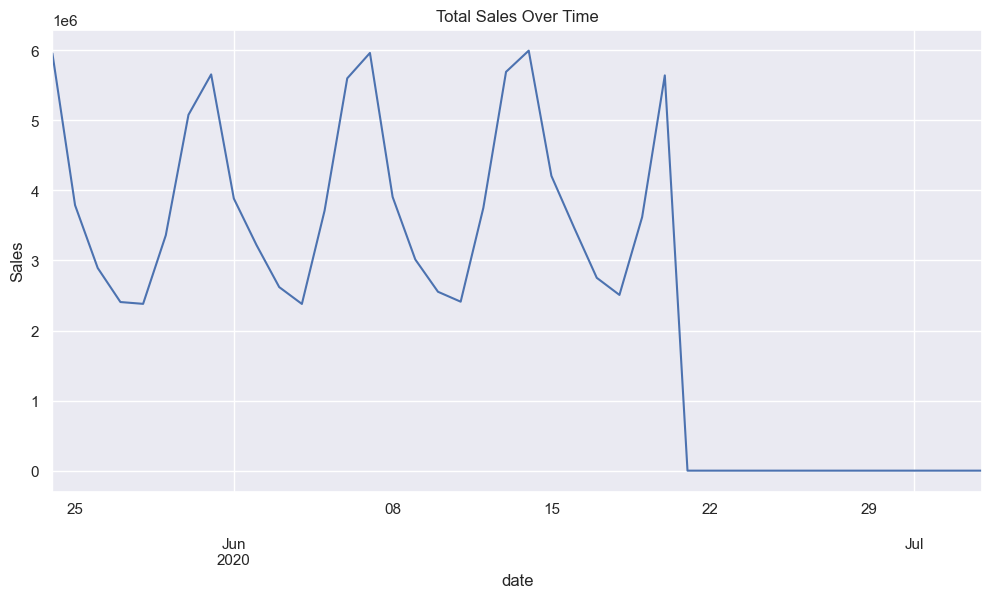

In [10]:
sales_trend = df.groupby("date")["sales"].sum()

plt.figure(figsize=(12,6))
sales_trend.plot()
plt.title("Total Sales Over Time")
plt.ylabel("Sales")
plt.show()


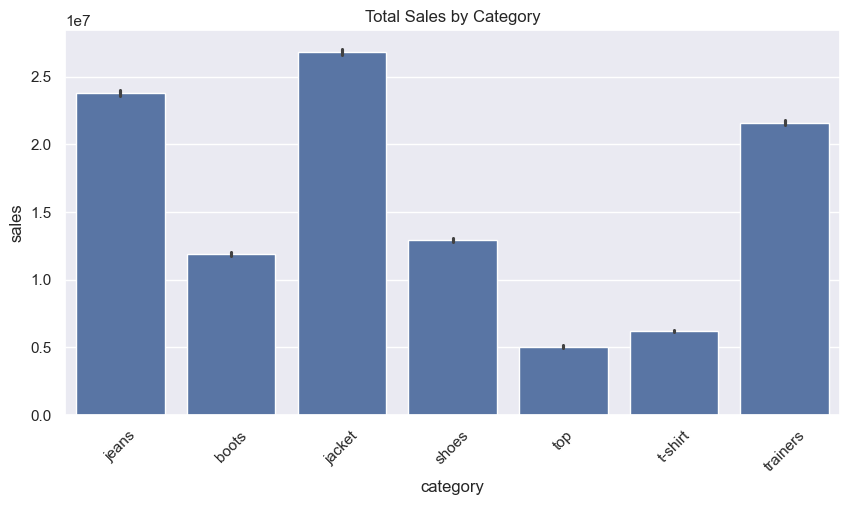

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x="category", y="sales", data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Sales by Category")
plt.show()


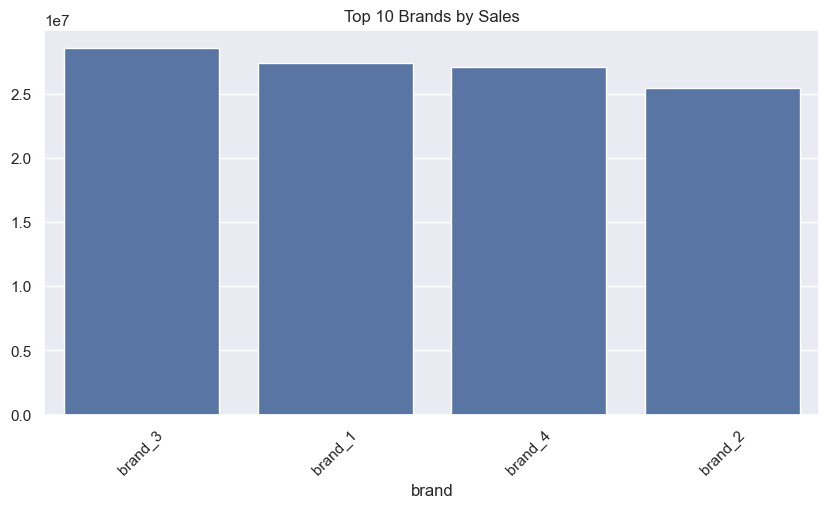

In [13]:
top_brands = df.groupby("brand")["sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xticks(rotation=45)
plt.title("Top 10 Brands by Sales")
plt.show()


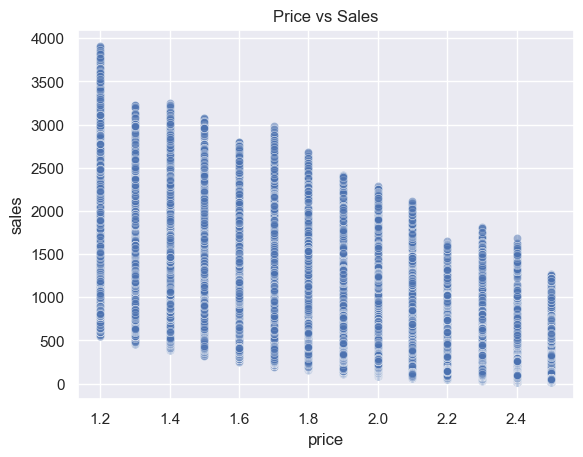

In [14]:
sns.scatterplot(x="price", y="sales", data=df, alpha=0.5)
plt.title("Price vs Sales")
plt.show()


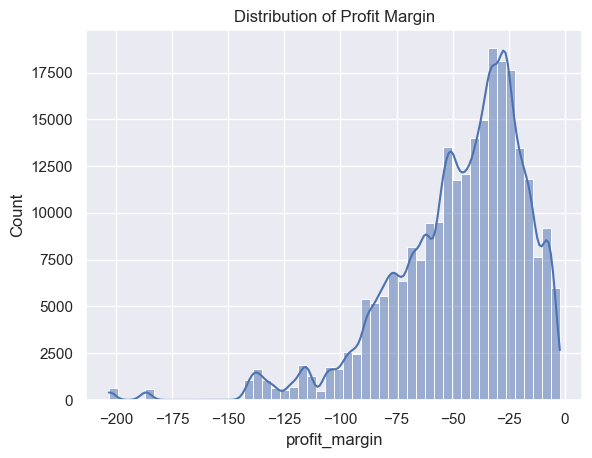

In [15]:
df["profit_margin"] = df["price"] - df["cost"]
sns.histplot(df["profit_margin"], bins=50, kde=True)
plt.title("Distribution of Profit Margin")
plt.show()


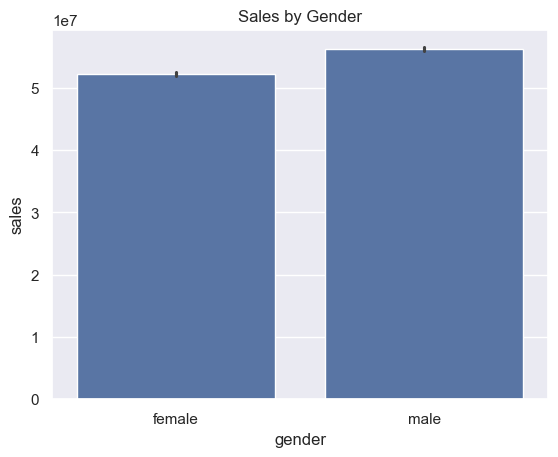

In [16]:
sns.barplot(x="gender", y="sales", data=df, estimator=sum)
plt.title("Sales by Gender")
plt.show()


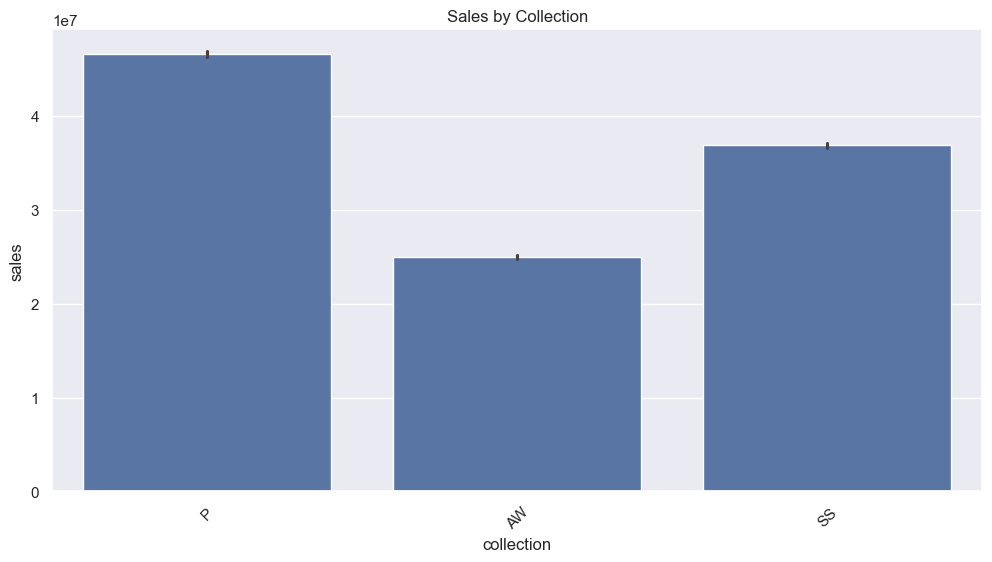

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x="collection", y="sales", data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title("Sales by Collection")
plt.show()


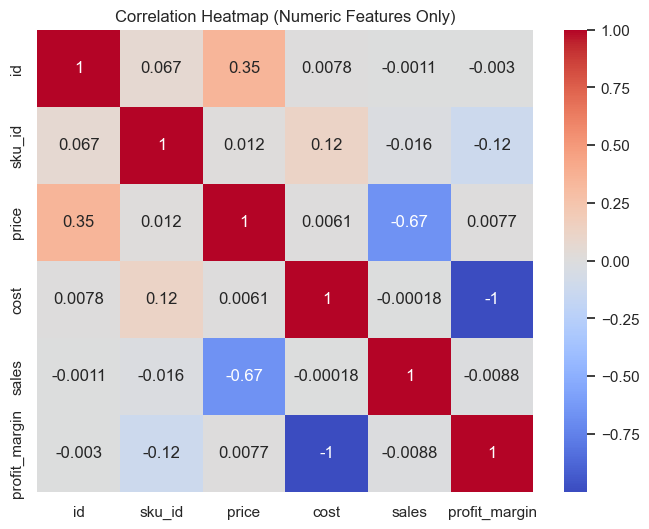

In [19]:

numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



In [7]:
X = pd.get_dummies(X, drop_first=True)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
print(X.dtypes) 

date                 datetime64[ns]
price                       float64
cost                        float64
gender_male                    bool
category_jacket                bool
category_jeans                 bool
category_shoes                 bool
category_t-shirt               bool
category_top                   bool
category_trainers              bool
brand_brand_2                  bool
brand_brand_3                  bool
brand_brand_4                  bool
collection_P                   bool
collection_SS                  bool
price_tier_low                 bool
price_tier_middle              bool
style_sport                    bool
dtype: object


In [16]:
X["date"] = (df["date"] - df["date"].min()).dt.days


In [18]:
X = X.astype(int, errors="ignore")


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
y = df["sales"]  
X = df.drop(columns=["sales", "id", "sku_id", "sku_name","date"])  


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
print(X.dtypes)

price         float64
gender         object
category       object
brand          object
collection     object
price_tier     object
style          object
cost          float64
dtype: object


In [30]:
X = X.astype(int)


In [31]:
print(X.dtypes)

price                int64
cost                 int64
gender_male          int64
category_jacket      int64
category_jeans       int64
category_shoes       int64
category_t-shirt     int64
category_top         int64
category_trainers    int64
brand_brand_2        int64
brand_brand_3        int64
brand_brand_4        int64
collection_P         int64
collection_SS        int64
price_tier_low       int64
price_tier_middle    int64
style_sport          int64
dtype: object


In [5]:
df = df.dropna(subset=["sales"])


In [38]:
print(df["sales"].isnull().sum())
print(df["sales"].dtype)


0
float64


In [40]:
# Define y and X fresh from cleaned df
y = df["sales"]
X = df.drop(columns=["sales", "id", "sku_id", "sku_name", "date"])

# Convert booleans to integers
X = X.astype(int)

# Train/Test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R²   :", r2)


📊 Model Evaluation:
MAE  : 335.435081492402
MSE  : 207364.52439045938
RMSE : 455.3729508770359
R²   : 0.3071872138534626


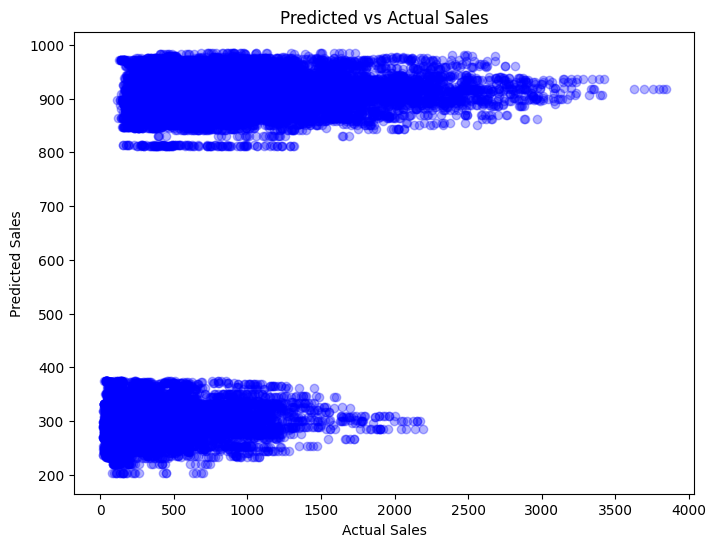

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.show()


In [6]:
y = df["sales"]

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek  
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)

X = df.drop(columns=["sales", "id", "sku_id", "sku_name","date"])

X = pd.get_dummies(X, drop_first=True)

X = X.astype(int)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Random Forest Evaluation:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)




📊 Random Forest Evaluation:
MAE : 19.24875467477981
MSE : 699.6296286938349
RMSE: 26.45051282477969
R²  : 0.9976625107223579


In [11]:
from sklearn.metrics import r2_score


y_train_pred = rf.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("📊 R² on Training Data:", r2_train)
print("📊 R² on Test Data    :", r2_test)


📊 R² on Training Data: 0.9980518610498347
📊 R² on Test Data    : 0.9976625107223579


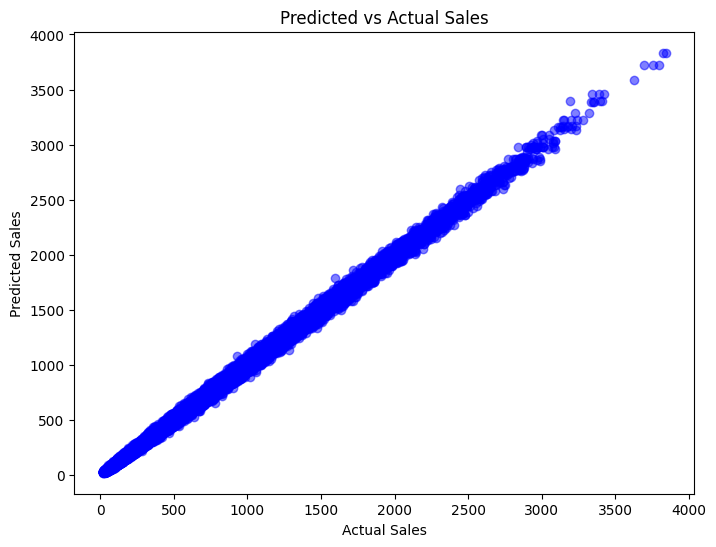

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.show()


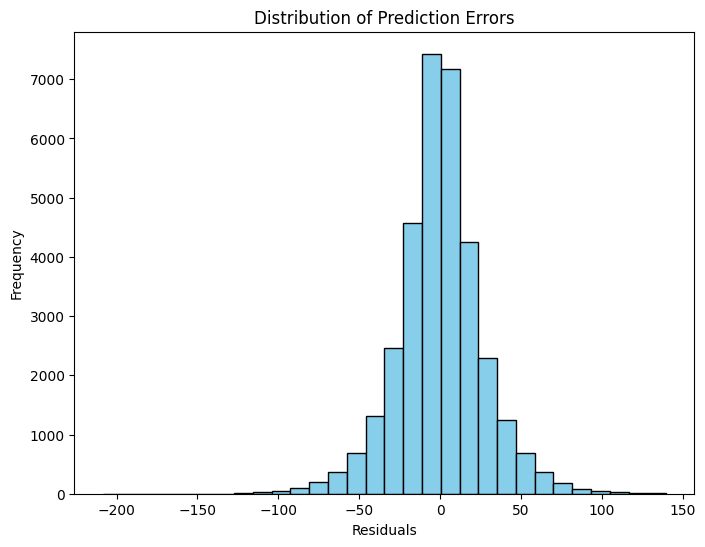

In [8]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


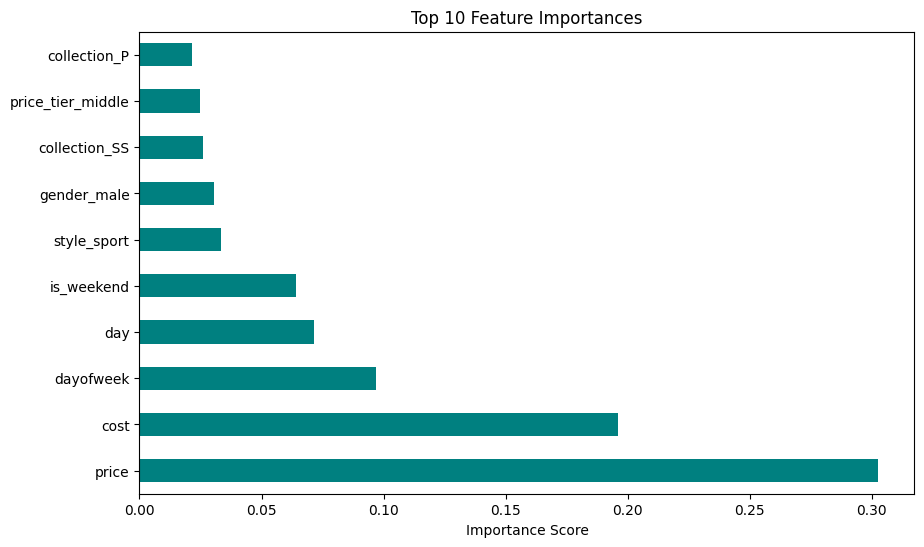

In [10]:
import pandas as pd
import numpy as np

importances = rf.feature_importances_
features = X.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importances.head(10).plot(kind="barh", color="teal")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()
